Попробуйте обучить нейронную сеть LSTM на любом другом датасете (любимый временной ряд, текст на русском (другом языке) как генератор или классификатор, или прилагаемый набор airline-passengers - пасажиропоток для авиалиний). Опишите, какой результата вы получили? Что помогло вам улучшить ее точность?

In [122]:
import numpy
import pandas
import matplotlib.pyplot as plt

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM
from sklearn.preprocessing import MinMaxScaler

%matplotlib inline
%config InlineBackend.figure_format = 'svg'

In [123]:
def create_dataset(dataset, look_back=1):
    input_dataset = []
    output_dataset = []
    for i in range(len(dataset) - look_back):
        input_dataset.append(dataset[i:i+look_back])
        output_dataset.append(dataset[i+look_back])
    return numpy.array(input_dataset), numpy.array(output_dataset)

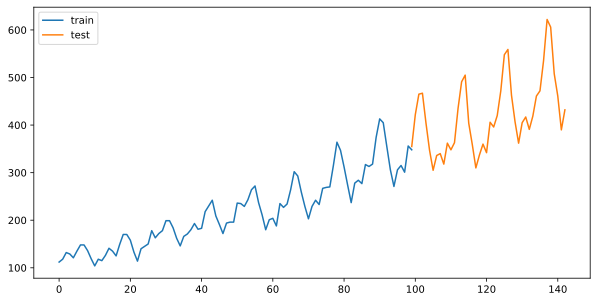

In [124]:
dataframe = pandas.read_csv('airline-passengers.csv')
dataframe.head()
dataset = dataframe['Passengers'].values
dataset = dataset.astype('float32')

train_size = int(len(dataset) * 0.70)
test_size = len(dataset) - train_size

train, test = dataset[:train_size], dataset[train_size:]
plt.figure(figsize=[10, 5])
plt.plot(train,label='train')
plt.plot(range(len(train) - 1, len(train) - 1 + len(test)), test, label='test')
plt.legend()
plt.show()

In [125]:
look_back = 1
train_input, train_output = create_dataset(train)
test_input, test_output = create_dataset(test)

len(train_input), len(train_output)

(99, 99)

In [126]:
train_input = train_input.reshape(train_input.shape[0], 1, train_input.shape[1])
test_input = test_input.reshape(test_input.shape[0], 1, test_input.shape[1])

In [191]:
model = Sequential()
model.add(LSTM(64, input_shape=(1, look_back)))
model.add(Dense(10, activation='relu'))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse', metrics=['mae'])
model.fit(train_input, train_output, epochs=100, batch_size=1, verbose=2)

Epoch 1/100
99/99 - 1s - loss: 52772.0234 - mae: 217.6326
Epoch 2/100
99/99 - 0s - loss: 50063.0859 - mae: 211.2524
Epoch 3/100
99/99 - 0s - loss: 42668.2266 - mae: 193.3871
Epoch 4/100
99/99 - 0s - loss: 33367.6250 - mae: 167.0250
Epoch 5/100
99/99 - 0s - loss: 24644.4492 - mae: 138.7298
Epoch 6/100
99/99 - 0s - loss: 17409.6895 - mae: 109.5683
Epoch 7/100
99/99 - 0s - loss: 12150.8057 - mae: 86.4308
Epoch 8/100
99/99 - 0s - loss: 8839.7988 - mae: 71.7970
Epoch 9/100
99/99 - 0s - loss: 6974.9268 - mae: 64.0491
Epoch 10/100
99/99 - 0s - loss: 5835.1357 - mae: 59.0674
Epoch 11/100
99/99 - 0s - loss: 4901.5103 - mae: 54.0152
Epoch 12/100
99/99 - 0s - loss: 4391.5596 - mae: 51.3291
Epoch 13/100
99/99 - 0s - loss: 3971.3096 - mae: 49.1101
Epoch 14/100
99/99 - 0s - loss: 3788.6812 - mae: 48.2087
Epoch 15/100
99/99 - 0s - loss: 3563.7180 - mae: 47.3247
Epoch 16/100
99/99 - 0s - loss: 3203.6118 - mae: 44.3980
Epoch 17/100
99/99 - 0s - loss: 3060.7834 - mae: 43.3543
Epoch 18/100
99/99 - 0s - l

In [192]:
train_predict = model.predict(train_input)
test_predict = model.predict(test_input)


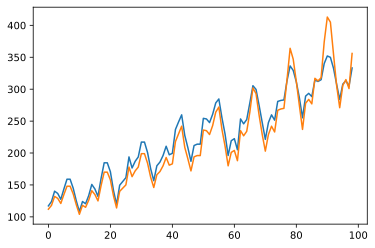

In [193]:
train_predict.reshape(train_predict.shape[0])
plt.plot(train_predict, label='train_preedict')
plt.plot(train_input.flatten(), label='train_input')
plt.show()

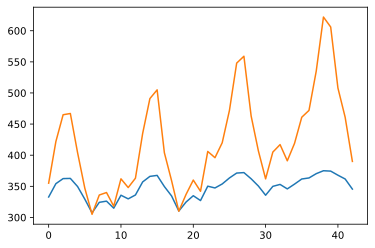

In [194]:
test_predict.reshape(test_predict.shape[0])
plt.plot(test_predict, label='test_preedict')
plt.plot(test_input.flatten(), label='test_input')
plt.show()

Получен хороший результат на обучающей выборке, но на тестовой выбрке удается предсказать в основном только тренд. Увеличение количества слоев LSTM, а также количества нейронов в LSTM не дает улучшение качества. Лучший результат показывает один слой LSTM и относительно не большое количество нейронов в даннм слое (32-64).